In [122]:
pip install river==0.21.0

Note: you may need to restart the kernel to use updated packages.


In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
#import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from scipy.stats import shapiro
#import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from river import metrics
import time


In [124]:
dfd =pd.read_csv("Desktop/certificates/Ml_Edge_binary_gwo_Selected_Features.csv")

In [125]:
dfd = dfd.sample(frac=0.1)

In [126]:
X = dfd.drop(['Attack_label'],axis=1)
y = dfd['Attack_label']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.2, test_size = 0.8, shuffle=False,random_state = 0)



In [127]:
dfd.head(5)
print(dfd['Attack_label'].value_counts())

Attack_label
1    13346
0     2434
Name: count, dtype: int64


In [128]:

def adaptive_learning(model, X_train, y_train, X_test, y_test):
    metric = metrics.Accuracy() # Use accuracy as the metric
    i = 0 # count the number of evaluated data points
    t = [] # record the number of evaluated data points
    m = [] # record the real-time accuracy
    yt = [] # record all the true labels of the test set
    yp = [] # record all the predicted labels of the test set
    
    eddm = drift.binary.EDDM()
    #detector = EDDM()
    
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)  # Encode training labels
    y_test = le.transform(y_test)  # Encode test labels


    
    # Learn the training set
    for xi1, yi1 in zip(X_train.values, y_train): 
        xi = dict(zip(X_train.columns, xi1))   
        model.learn_one(xi, yi1) 

    # Predict the test set and perform drift detection
    for x_val, y_val in zip(X_test.values, y_test):
        x = dict(zip(X_test.columns, x_val))
        y_pred = (model.predict_one(x))  # Convert to nearest class label
  # Predict the test sample
        model.learn_one(x, y_val) # Learn the test sample
        metric.update(y_val, y_pred) # Update the real-time accuracy
        
        # Drift detection part
        val = 0
        
        if y_val != y_pred:
           val = 1 
           eddm.update(y_val)
        if eddm.drift_detected:
            print(f"Change detected at index {i}, input value: {y_val}")
            
           
        if eddm.warning_detected:
           print(f"Warning detected at index {i}")
        # Print samples every 80 iterations
        #if i % 80 == 0:
           # print(f"Sample {i}: True label: {y_val}, Predicted label: {y_pred}") 

        # Performance evaluation
        t.append(i)
        m.append(metric.get() * 100)
        yt.append(y_val)
        yp.append(y_pred)
        i += 1
        

    print("Accuracy: " + str(round(accuracy_score(yt, yp), 4) * 100) + "%")
    print("Precision: " + str(round(precision_score(yt, yp), 4) * 100) + "%")
    print("Recall: " + str(round(recall_score(yt, yp), 4) * 100) + "%")
    print("F1-score: " + str(round(f1_score(yt, yp), 4) * 100) + "%")

    return t, m

In [129]:
# Define a figure function that shows the real-time accuracy changes
def acc_fig(t, m, name):
    plt.rcParams.update({'font.size': 15})
    plt.figure(1,figsize=(10,6)) 
    sns.set_style("darkgrid")
    plt.clf() 
    #if m:  # Check if m is not empty
    plt.plot(t, m, '-b', label='Avg Accuracy: %.2f%%' % (m[-1]))

    #plt.plot(t,m,'-b',label='Avg Accuracy: %.2f%%'%(m[-1]))

    plt.legend(loc='best')
    plt.title(name+' on Farmflow dataset', fontsize=15)
    plt.xlabel('Number of samples')
    plt.ylabel('Accuracy (%)')

    plt.draw()


In [130]:
from river import forest
from river import drift

Accuracy: 99.97%
Precision: 99.96000000000001%
Recall: 100.0%
F1-score: 99.98%
CPU times: total: 4.52 s
Wall time: 8.6 s


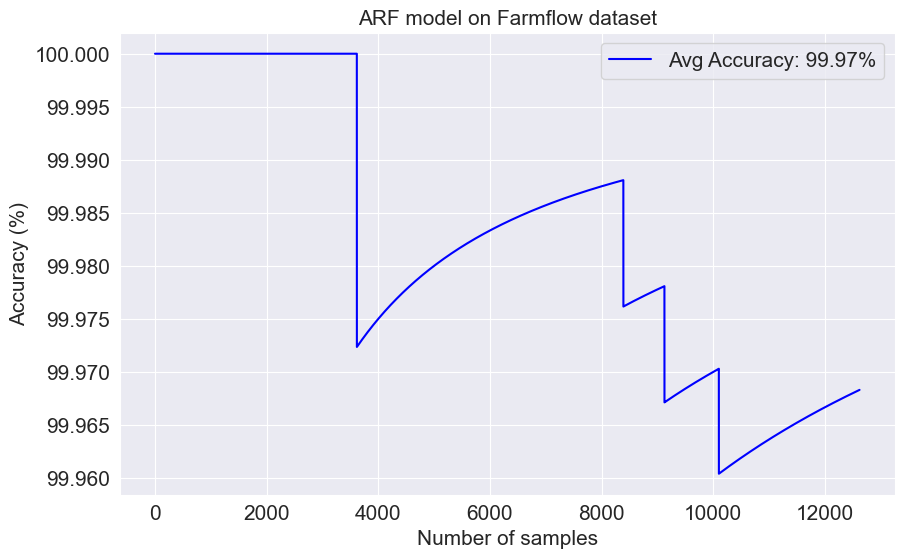

In [131]:
get_ipython().run_cell_magic('time', '', '# Use the Adaptive Random Forest (ARF) model with ADWIN drift detector as a baseline model\nname = "ARF model"\n\n\nmodel = drift.DriftRetrainingClassifier(\n    model=forest.ARFClassifier(n_models = 3,drift_detector=drift.binary.EDDM())\n    \n)\n\nt, m = adaptive_learning(model, X_train, y_train, X_test, y_test) # Learn the model on the dataset\nacc_fig(t, m, name) # Draw the figure of how the real-time accuracy changes with the number of samples\n')

Change detected at index 1602, input value: 1
Change detected at index 1603, input value: 1
Change detected at index 1604, input value: 1
Change detected at index 1605, input value: 1
Change detected at index 1606, input value: 1
Change detected at index 1607, input value: 0
Change detected at index 1608, input value: 1
Change detected at index 1609, input value: 1
Warning detected at index 2826
Warning detected at index 2827
Warning detected at index 2828
Warning detected at index 2829
Warning detected at index 2830
Warning detected at index 2831
Warning detected at index 2832
Warning detected at index 2833
Warning detected at index 2834
Warning detected at index 2835
Warning detected at index 2836
Warning detected at index 2837
Warning detected at index 2838
Warning detected at index 2839
Warning detected at index 2840
Warning detected at index 2841
Warning detected at index 2842
Warning detected at index 2843
Warning detected at index 2844
Warning detected at index 2845
Warning dete

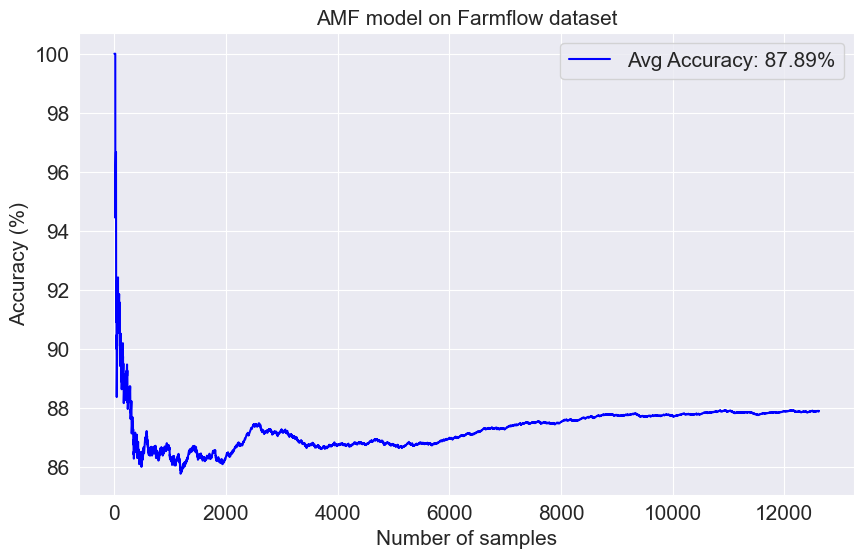

In [132]:
get_ipython().run_cell_magic('time', '', '# Use the Aggregated Mondrian Forest (AMF) model with ADWIN drift detector as a baseline model\nname = "AMF model"\n\n\nmodel=forest.AMFClassifier(n_estimators = 3,use_aggregation=True)\n    \n\nt, m = adaptive_learning(model, X_train, y_train, X_test, y_test) # Learn the model on the dataset\nacc_fig(t, m, name) # Draw the figure of how the real-time accuracy changes with the number of samples\n')


In [133]:
from river import tree

Accuracy: 99.97%
Precision: 99.96000000000001%
Recall: 100.0%
F1-score: 99.98%
CPU times: total: 5.95 s
Wall time: 9.55 s


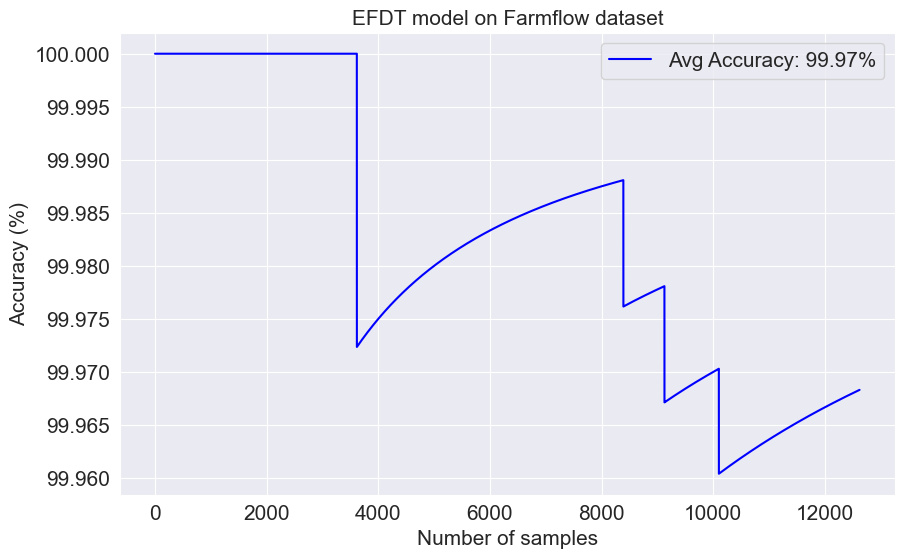

In [134]:
get_ipython().run_cell_magic('time', '', '# Use the Extremely Fast decision Tree (AMF) model with ADWIN drift detector as a baseline model\nname = "EFDT model"\n\n\nmodel=tree.ExtremelyFastDecisionTreeClassifier()\n    \n\nt, m = adaptive_learning(model, X_train, y_train, X_test, y_test) # Learn the model on the dataset\nacc_fig(t, m, name) # Draw the figure of how the real-time accuracy changes with the number of samples\n')

Accuracy: 99.97%
Precision: 99.96000000000001%
Recall: 100.0%
F1-score: 99.98%
CPU times: total: 1.92 s
Wall time: 4.39 s


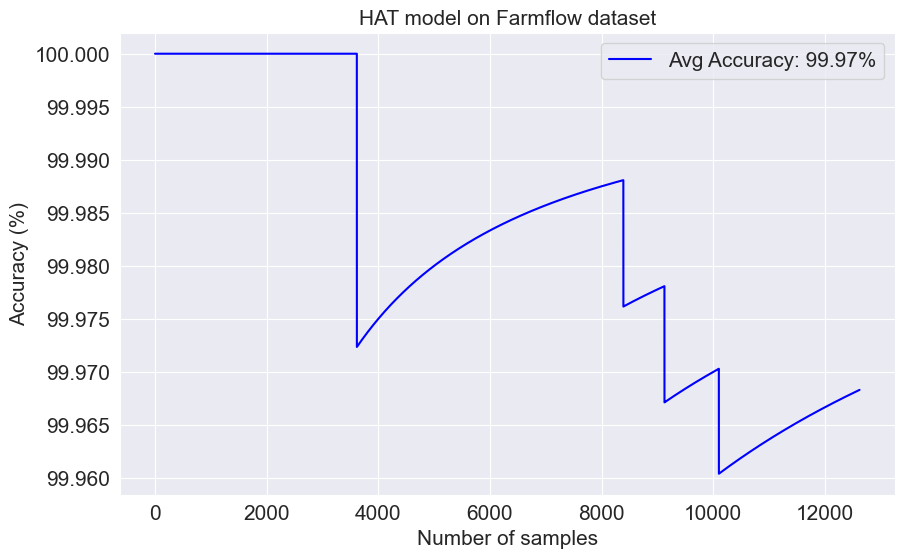

In [135]:

get_ipython().run_cell_magic('time', '', '# Use the Hoeffdinng Adaptive Tree model with ADWIN drift detector as a baseline model\nname = "HAT model"\n\n\nmodel = drift.DriftRetrainingClassifier(\n    model=tree.HoeffdingAdaptiveTreeClassifier(drift_detector=drift.binary.EDDM())\n    \n)\n\nt, m = adaptive_learning(model, X_train, y_train, X_test, y_test) # Learn the model on the dataset\nacc_fig(t, m, name) # Draw the figure of how the real-time accuracy changes with the number of samples\n')

Accuracy: 99.97%
Precision: 99.96000000000001%
Recall: 100.0%
F1-score: 99.98%
CPU times: total: 2.73 s
Wall time: 4.22 s


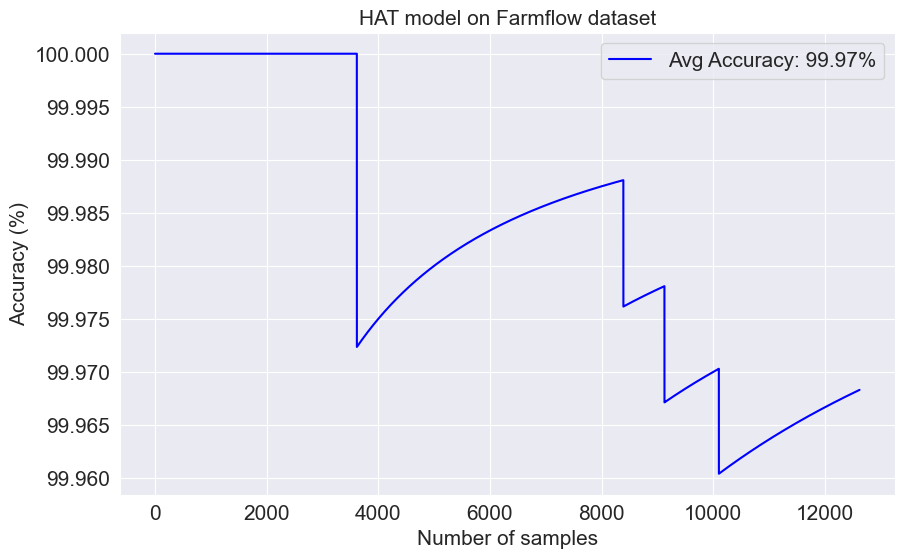

In [138]:
get_ipython().run_cell_magic('time', '', '# Use the Extremely Fast decision Tree (AMF) model with ADWIN drift detector as a baseline model\nname = "HAT model"\n\n\nmodel=tree.HoeffdingAdaptiveTreeClassifier()\n    \n\nt, m = adaptive_learning(model, X_train, y_train, X_test, y_test) # Learn the model on the dataset\nacc_fig(t, m, name) # Draw the figure of how the real-time accuracy changes with the number of samples\n')

Accuracy: 99.67%
Precision: 99.64%
Recall: 99.97%
F1-score: 99.8%
CPU times: total: 2.03 s
Wall time: 4.66 s


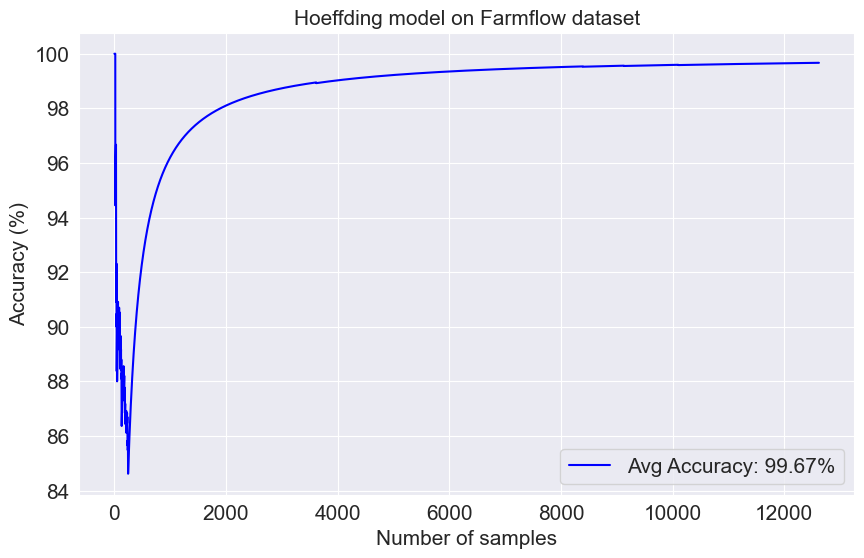

In [141]:
get_ipython().run_cell_magic('time', '', '# Use the Hoeffding Tree classifier model with ADWIN drift detector as a baseline model\nname = "Hoeffding model"\n\n\nmodel=tree.HoeffdingTreeClassifier()\n    \n\nt, m = adaptive_learning(model, X_train, y_train, X_test, y_test) # Learn the model on the dataset\nacc_fig(t, m, name) # Draw the figure of how the real-time accuracy changes with the number of samples\n')

In [147]:
from river import ensemble

Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1-score: 100.0%
CPU times: total: 18.7 s
Wall time: 29.6 s


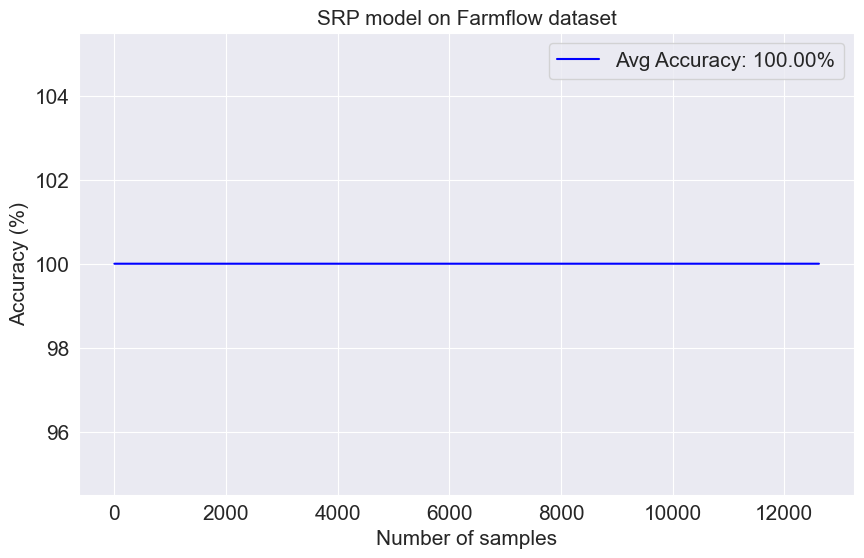

In [190]:
get_ipython().run_cell_magic('time', '', '# Use the Streaming Random Patches (SRP) model with ADWIN drift detector as a baseline model\nname = "SRP model"\n\n\nbase_model = tree.HoeffdingTreeClassifier()\n\nmodel = ensemble.SRPClassifier(\n    model=base_model, n_models=3, seed=42,\n)\n    \n\nt, m = adaptive_learning(model, X_train, y_train, X_test, y_test) # Learn the model on the dataset\nacc_fig(t, m, name) # Draw the figure of how the real-time accuracy changes with the number of samples\n')

In [191]:
# For basic handling
import pandas as pd
import numpy as np

# River modules for online learning
from river import linear_model
from river import preprocessing
from river import metrics
from river import compose
from river import drift
from river import multiclass

# Visualization
import matplotlib.pyplot as plt

# Time (since you're using %time cell magic)
import time


Warning detected at index 308
Warning detected at index 309
Warning detected at index 310
Warning detected at index 327
Warning detected at index 328
Warning detected at index 329
Warning detected at index 330
Warning detected at index 331
Warning detected at index 332
Warning detected at index 333
Warning detected at index 334
Warning detected at index 335
Warning detected at index 336
Warning detected at index 337
Warning detected at index 338
Warning detected at index 340
Warning detected at index 341
Warning detected at index 342
Warning detected at index 343
Warning detected at index 344
Warning detected at index 345
Warning detected at index 346
Warning detected at index 347
Warning detected at index 348
Warning detected at index 349
Warning detected at index 350
Warning detected at index 351
Warning detected at index 352
Warning detected at index 353
Warning detected at index 354
Warning detected at index 355
Warning detected at index 356
Warning detected at index 357
Warning de

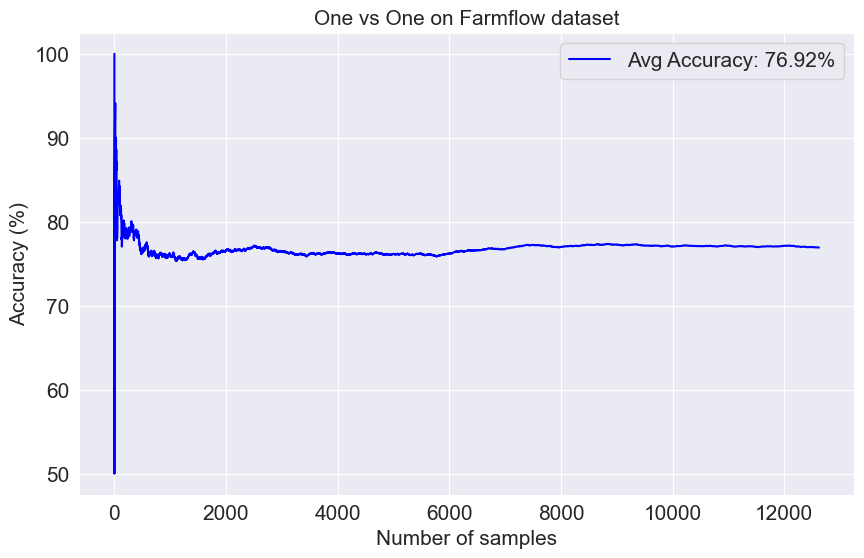

In [192]:
get_ipython().run_cell_magic('time', '', '\n# One-vs-One with Logistic Regression\nname = "One vs One"\nmodel = multiclass.OneVsOneClassifier(linear_model.LogisticRegression())\n\nt, m = adaptive_learning(model, X_train, y_train, X_test, y_test)\nacc_fig(t, m, name)\n')

Warning detected at index 339
Warning detected at index 340
Warning detected at index 341
Warning detected at index 342
Warning detected at index 343
Warning detected at index 344
Warning detected at index 345
Warning detected at index 346
Warning detected at index 347
Warning detected at index 348
Warning detected at index 349
Warning detected at index 350
Warning detected at index 351
Warning detected at index 352
Warning detected at index 353
Warning detected at index 354
Warning detected at index 355
Warning detected at index 356
Warning detected at index 357
Warning detected at index 358
Warning detected at index 359
Warning detected at index 360
Warning detected at index 361
Warning detected at index 362
Warning detected at index 363
Warning detected at index 364
Change detected at index 365, input value: 1
Warning detected at index 365
Change detected at index 366, input value: 1
Warning detected at index 366
Change detected at index 367, input value: 1
Warning detected at index

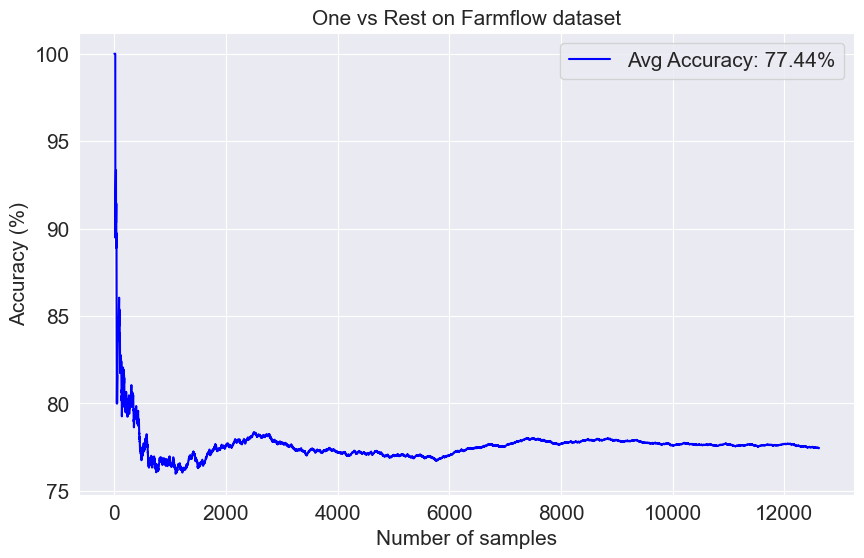

In [193]:
get_ipython().run_cell_magic('time', '', '# Use One vs Rest classifier model with ADWIN drift detector as a baseline model\nname = "One vs Rest"\n\n\nmodel=multiclass.OneVsRestClassifier(linear_model.LogisticRegression())\n    \n\nt, m = adaptive_learning(model, X_train, y_train, X_test, y_test) # Learn the model on the dataset\nacc_fig(t, m, name) # Draw the figure of how the real-time accuracy changes with the number of samples\n')


Warning detected at index 311
Warning detected at index 312
Warning detected at index 313
Warning detected at index 314
Warning detected at index 315
Warning detected at index 316
Warning detected at index 317
Warning detected at index 318
Warning detected at index 319
Warning detected at index 320
Warning detected at index 321
Warning detected at index 322
Warning detected at index 323
Warning detected at index 324
Warning detected at index 325
Warning detected at index 326
Warning detected at index 327
Warning detected at index 328
Warning detected at index 329
Warning detected at index 330
Warning detected at index 331
Warning detected at index 332
Warning detected at index 333
Warning detected at index 334
Warning detected at index 335
Warning detected at index 336
Warning detected at index 337
Warning detected at index 338
Warning detected at index 339
Warning detected at index 340
Warning detected at index 341
Warning detected at index 342
Warning detected at index 343
Warning de

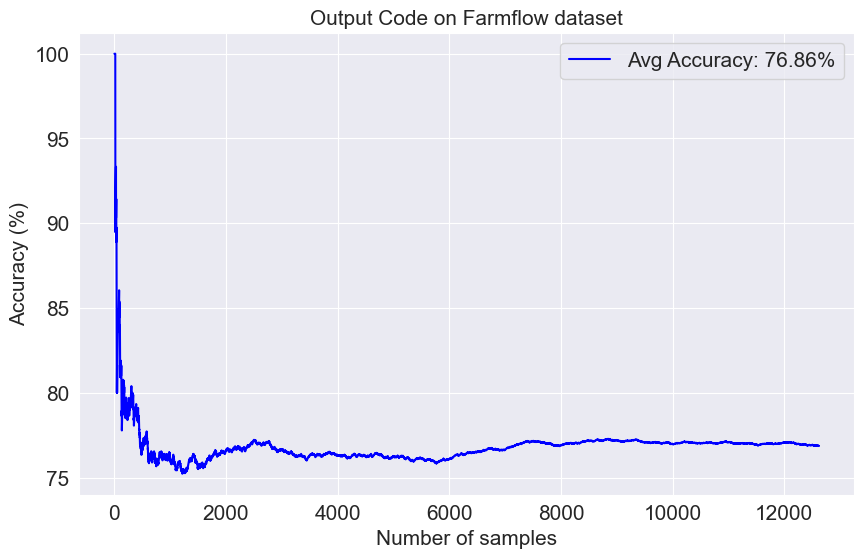

In [194]:
get_ipython().run_cell_magic('time', '', '# Output Code Classifier with Logistic Regression\nname = "Output Code"\nmodel = multiclass.OutputCodeClassifier(linear_model.LogisticRegression(),code_size=5)\n\nt, m = adaptive_learning(model, X_train, y_train, X_test, y_test)\nacc_fig(t, m, name)\n')
